# Image Preprocessing
### This notebook will be used to create a custom dataset.
### Dataset reference: sriramr/fruits-fresh-and-rotten-for-classification (Kaggle)

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import tensorflow_datasets as tfds
import os
from PIL import Image

In [ ]:
# Mounting Google Drive to Colab (using Bangkit account)
from google.colab import drive
from google.colab import files

drive.mount('/gdrive')
# files.upload()

Mounted at /gdrive


In [ ]:
os.chdir('/content')
os.getcwd()

'/content'

In [ ]:
!cp -av '/gdrive/MyDrive/Kaggle/lemonDatasetRaw.zip' .
!unzip -q 'lemonDatasetRaw.zip'
!rm 'lemonDatasetRaw.zip'

'/gdrive/MyDrive/Kaggle/lemonDatasetRaw.zip' -> './lemonDatasetRaw.zip'


## Image previews

In [ ]:
fresh_train = '/content/dataset/train/freshlemon/'
rotten_train = '/content/dataset/train/rottenlemon/'
fresh_test = '/content/dataset/test/freshlemon/'
rotten_test = '/content/dataset/test/rottenlemon/'

fresh_files = os.listdir(fresh_train)
rotten_files = os.listdir(rotten_train)
fresh_files_1 = os.listdir(fresh_test)
rotten_files_1 = os.listdir(rotten_test)

fresh_pic = [os.path.join(fresh_train, fname) 
                for fname in fresh_files 
               ]

rotten_pic = [os.path.join(rotten_train, fname) 
                for fname in rotten_files
               ]

fresh_pic_1 = [os.path.join(fresh_test, fname) 
                for fname in fresh_files_1
               ]

rotten_pic_1 = [os.path.join(rotten_test, fname) 
                for fname in rotten_files_1
               ]

In [ ]:
# for i, img_path in enumerate(fresh_pic):
#   img = Image.open(img_path)
#   img.save('/content/lemon/train/freshlemon/new_fresh_{}.png'.format(i))

# for i, img_path in enumerate(rotten_pic):
#   img = Image.open(img_path)
#   img.save('/content/lemon/train/rottenlemon/new_rotten_{}.png'.format(i))

# for i, img_path in enumerate(fresh_pic_1):
#   img = Image.open(img_path)
#   img.save('/content/lemon/test/freshlemon/new_fresh_{}.png'.format(i))

# for i, img_path in enumerate(rotten_pic_1):
#   img = Image.open(img_path)
#   img.save('/content/lemon/test/rottenlemon/new_rotten_{}.png'.format(i))

In [ ]:
# !zip -r /content/file.zip /content/lemon/

# files.download("/content/file.zip")

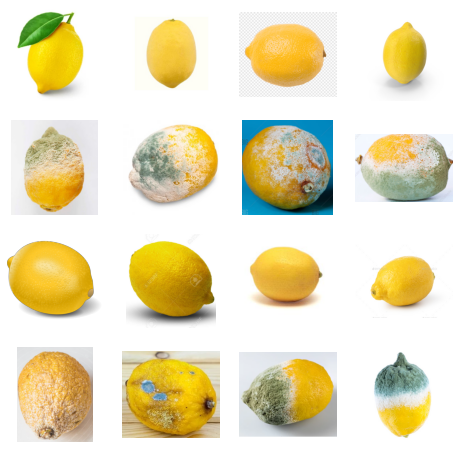

In [ ]:
n_rows = 4
n_cols = 4

index = 0
index += 4

fresh_pic = [os.path.join(fresh_train, fname) 
                for fname in fresh_files[0:index] 
               ]

rotten_pic = [os.path.join(rotten_train, fname) 
                for fname in rotten_files[0:index]
               ]

fresh_pic_1 = [os.path.join(fresh_test, fname) 
                for fname in fresh_files_1[0:index]
               ]

rotten_pic_1 = [os.path.join(rotten_test, fname) 
                for fname in rotten_files_1[0:index]
               ]

fig = plt.gcf()
fig.set_size_inches(n_cols*2, n_rows*2)

for i, img_path in enumerate(fresh_pic+rotten_pic+fresh_pic_1+rotten_pic_1):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(n_rows, n_cols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

## Image Augmentation (using ImageDataGenerator)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rotation_range=40,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='reflect',
)

In [ ]:
train_dir_0 = '/content/dataset/train/'
test_dir_0 = '/content/dataset/test/'

train_flow_0 = datagen.flow_from_directory(
    train_dir_0,
    target_size=(224,224),
    classes=['freshlemon'],
    save_to_dir='/content/augmented/train/freshlemon',
    save_prefix='aug',
    save_format='png',
    batch_size=24,
)

test_flow_0 = datagen.flow_from_directory(
    test_dir_0,
    target_size=(224,224),
    classes=['freshlemon'],
    save_to_dir='/content/augmented/test/freshlemon',
    save_prefix='aug',
    save_format='png',
    batch_size=12,
)

train_flow_1 = datagen.flow_from_directory(
    train_dir_0,
    target_size=(224,224),
    classes=['rottenlemon'],
    save_to_dir='/content/augmented/train/rottenlemon',
    save_prefix='aug',
    save_format='png',
    batch_size=24,
)

test_flow_1 = datagen.flow_from_directory(
    test_dir_0,
    target_size=(224,224),
    classes=['rottenlemon'],
    save_to_dir='/content/augmented/test/rottenlemon',
    save_prefix='aug',
    save_format='png',
    batch_size=12,
)

Found 30 images belonging to 1 classes.
Found 10 images belonging to 1 classes.
Found 29 images belonging to 1 classes.
Found 9 images belonging to 1 classes.


In [ ]:
os.mkdir('/content/augmented')
os.mkdir('/content/augmented/train')
os.mkdir('/content/augmented/test')
os.mkdir('/content/augmented/train/freshlemon')
os.mkdir('/content/augmented/test/freshlemon')
os.mkdir('/content/augmented/train/rottenlemon')
os.mkdir('/content/augmented/test/rottenlemon')

FileExistsError: ignored

In [ ]:
for i in range(20):
  train_flow_0.next()
  test_flow_0.next()
  train_flow_1.next()
  test_flow_1.next()

In [ ]:
!zip -r /content/file.zip /content/augmented

updating: content/augmented/ (stored 0%)
updating: content/augmented/test/ (stored 0%)
updating: content/augmented/test/rottenlemon/ (stored 0%)
updating: content/augmented/test/freshlemon/ (stored 0%)
updating: content/augmented/train/ (stored 0%)
updating: content/augmented/train/rottenlemon/ (stored 0%)
updating: content/augmented/train/freshlemon/ (stored 0%)
  adding: content/augmented/test/rottenlemon/aug_7_8663559.png (deflated 0%)
  adding: content/augmented/test/rottenlemon/aug_1_1374138.png (deflated 0%)
  adding: content/augmented/test/rottenlemon/aug_2_9070548.png (deflated 0%)
  adding: content/augmented/test/rottenlemon/aug_7_2200769.png (deflated 0%)
  adding: content/augmented/test/rottenlemon/aug_3_4003870.png (deflated 0%)
  adding: content/augmented/test/rottenlemon/aug_4_7560902.png (deflated 0%)
  adding: content/augmented/test/rottenlemon/aug_5_4911371.png (deflated 0%)
  adding: content/augmented/test/rottenlemon/aug_1_2223889.png (deflated 0%)
  adding: content/

In [ ]:
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>